In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [13]:
df = pd.read_csv('data/cleanedData_v2.csv')

In [14]:
to_remove = []
for col in df.columns.values:
    if 'share' in col:
        to_remove.append(col)
    if 'change' in col:
        to_remove.append(col)
df = df.drop(columns=to_remove)
try:
    df = df.drop(columns=['country', 'iso_code'])
except:
    print('columns already removed')
df = df.dropna()
sumOfDataGroupedByYear = df.groupby('year').sum()
sumOfDataGroupedByYear['years'] = sumOfDataGroupedByYear.index

<Axes: >

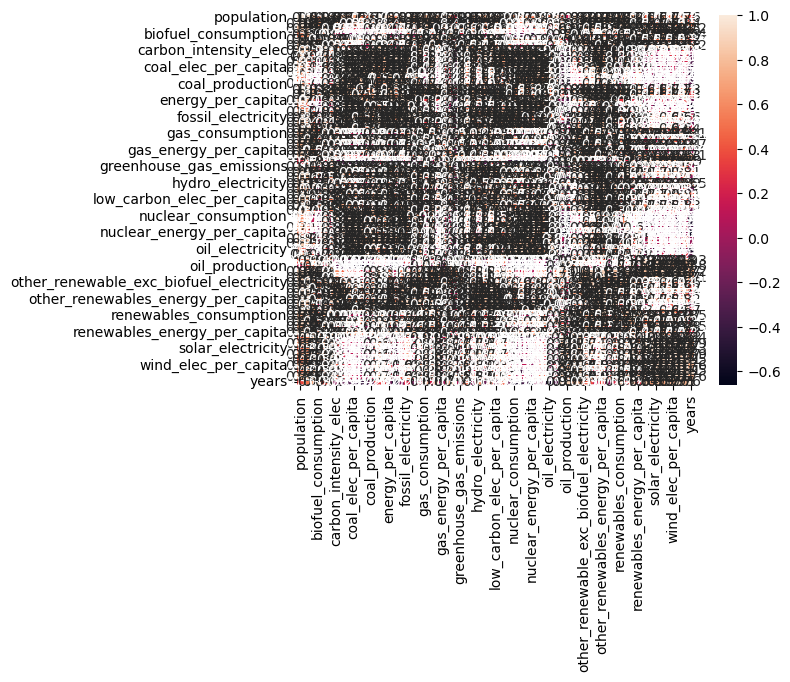

In [15]:
sns.heatmap(sumOfDataGroupedByYear.corr(), annot=True)

In [16]:
print(sumOfDataGroupedByYear.columns.values)

['population' 'gdp' 'biofuel_cons_per_capita' 'biofuel_consumption'
 'biofuel_elec_per_capita' 'biofuel_electricity' 'carbon_intensity_elec'
 'coal_cons_per_capita' 'coal_consumption' 'coal_elec_per_capita'
 'coal_electricity' 'coal_prod_per_capita' 'coal_production'
 'electricity_demand' 'electricity_generation' 'energy_per_capita'
 'energy_per_gdp' 'fossil_elec_per_capita' 'fossil_electricity'
 'fossil_energy_per_capita' 'fossil_fuel_consumption' 'gas_consumption'
 'gas_elec_per_capita' 'gas_electricity' 'gas_energy_per_capita'
 'gas_prod_per_capita' 'gas_production' 'greenhouse_gas_emissions'
 'hydro_consumption' 'hydro_elec_per_capita' 'hydro_electricity'
 'hydro_energy_per_capita' 'low_carbon_consumption'
 'low_carbon_elec_per_capita' 'low_carbon_electricity'
 'low_carbon_energy_per_capita' 'nuclear_consumption'
 'nuclear_elec_per_capita' 'nuclear_electricity'
 'nuclear_energy_per_capita' 'oil_consumption' 'oil_elec_per_capita'
 'oil_electricity' 'oil_energy_per_capita' 'oil_prod_

<Axes: xlabel='years', ylabel='renewables_energy_per_capita'>

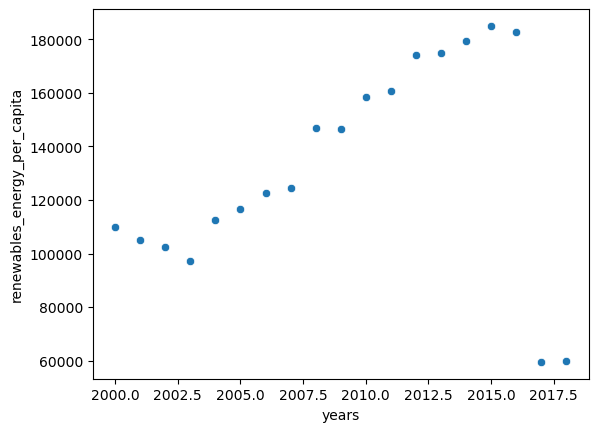

In [17]:
sns.scatterplot(x=sumOfDataGroupedByYear['years'], y=sumOfDataGroupedByYear['renewables_energy_per_capita'])

<Axes: xlabel='years', ylabel='hydro_energy_per_capita'>

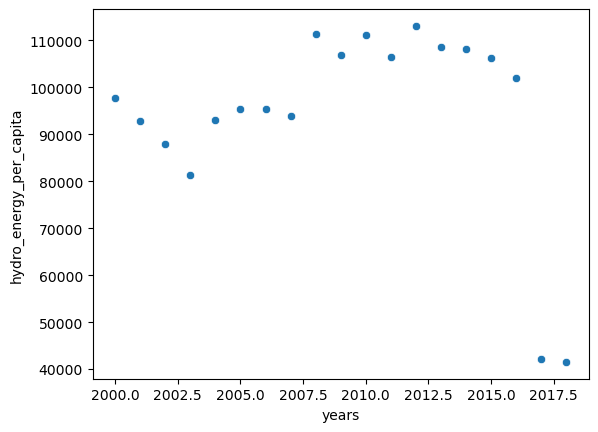

In [18]:
sns.scatterplot(x=sumOfDataGroupedByYear['years'], y=sumOfDataGroupedByYear['hydro_energy_per_capita'])

<Axes: xlabel='years', ylabel='solar_energy_per_capita'>

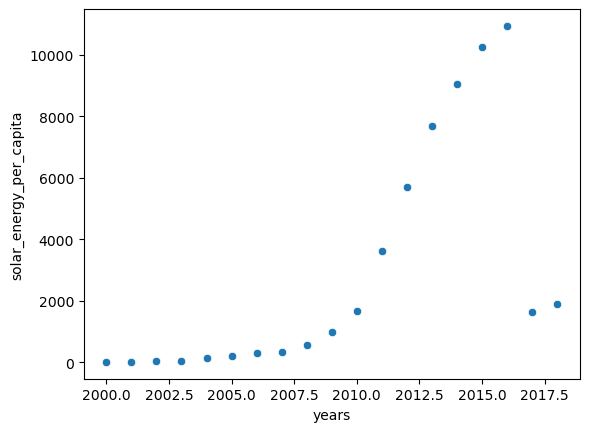

In [19]:
sns.scatterplot(x=sumOfDataGroupedByYear['years'], y=sumOfDataGroupedByYear['solar_energy_per_capita'])

In [40]:
# Create a quadratic model as well as drop 2017/2018 as they seem incomplete
Y = sumOfDataGroupedByYear['solar_energy_per_capita'].drop(index=[2017,2018]).to_numpy()
X = sumOfDataGroupedByYear['years'].drop(index=[2017,2018]).to_numpy()

X = X[:, np.newaxis]
Y = Y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

modelsolar = LinearRegression()
modelsolar.fit(X_poly, Y)



[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025]


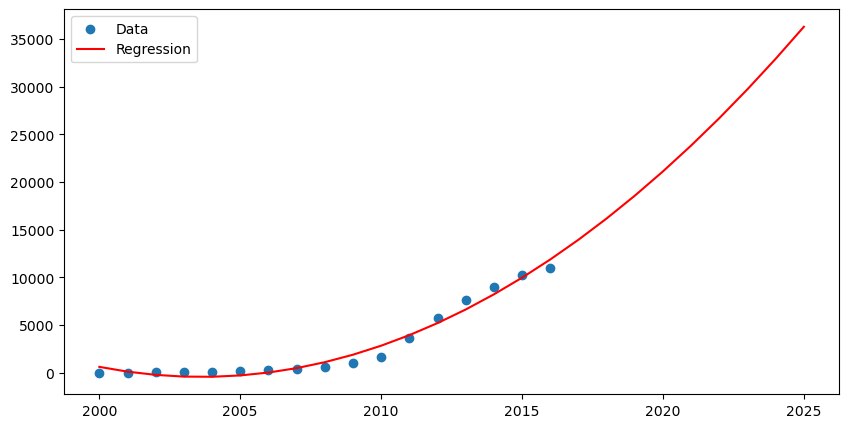

In [50]:
# Plot the original data and the regression curve
years = np.array([year for year in range(2000, 2026)])
years = years[:, np.newaxis]
years_poly = polynomial_features.fit_transform(years)
y_poly_pred = modelsolar.predict(years_poly)

plt.figure(figsize=(10, 5))
plt.scatter(X, Y, label='Data')
plt.plot(years, y_poly_pred, color='red', label='Regression')
plt.legend()
plt.show()